# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## Data Import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

In [39]:
# Load the dataset
df = pd.read_csv("E:\Vocational\Lighthouse Labs\Flex Course\Projects\P04_Unsupervised Learning\ml_project_unsupervised_learning\data\Wholesale_Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [40]:
df.shape

(440, 8)

## Data Cleaning

In [41]:
# Check the data types of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [42]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [43]:
# Identify duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


## Data Description

In [44]:
# Summary statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

## Data Visualization

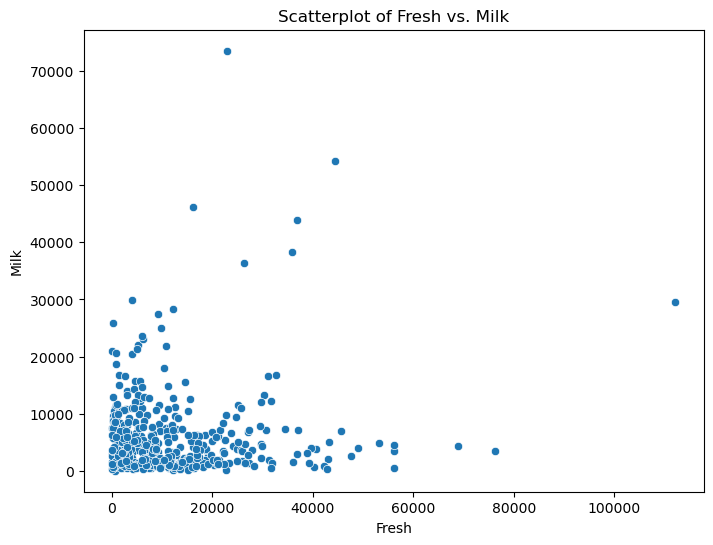

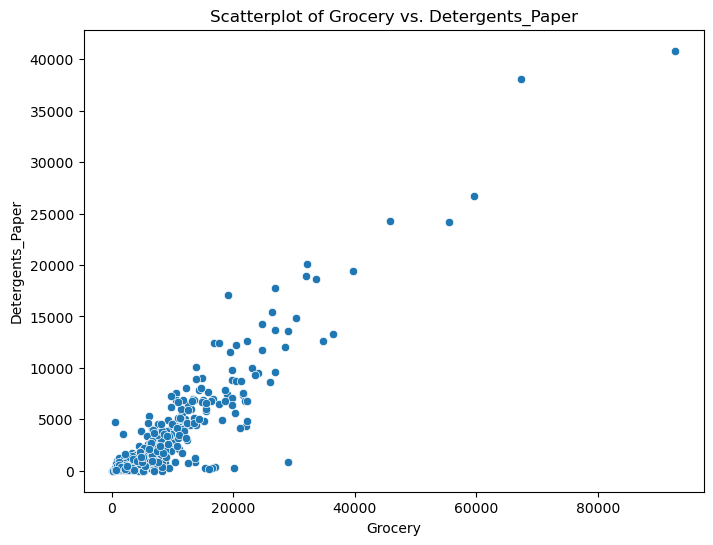

In [45]:
# Scatterplots
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Milk', data=df)
plt.title('Scatterplot of Fresh vs. Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Grocery', y='Detergents_Paper', data=df)
plt.title('Scatterplot of Grocery vs. Detergents_Paper')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.show()

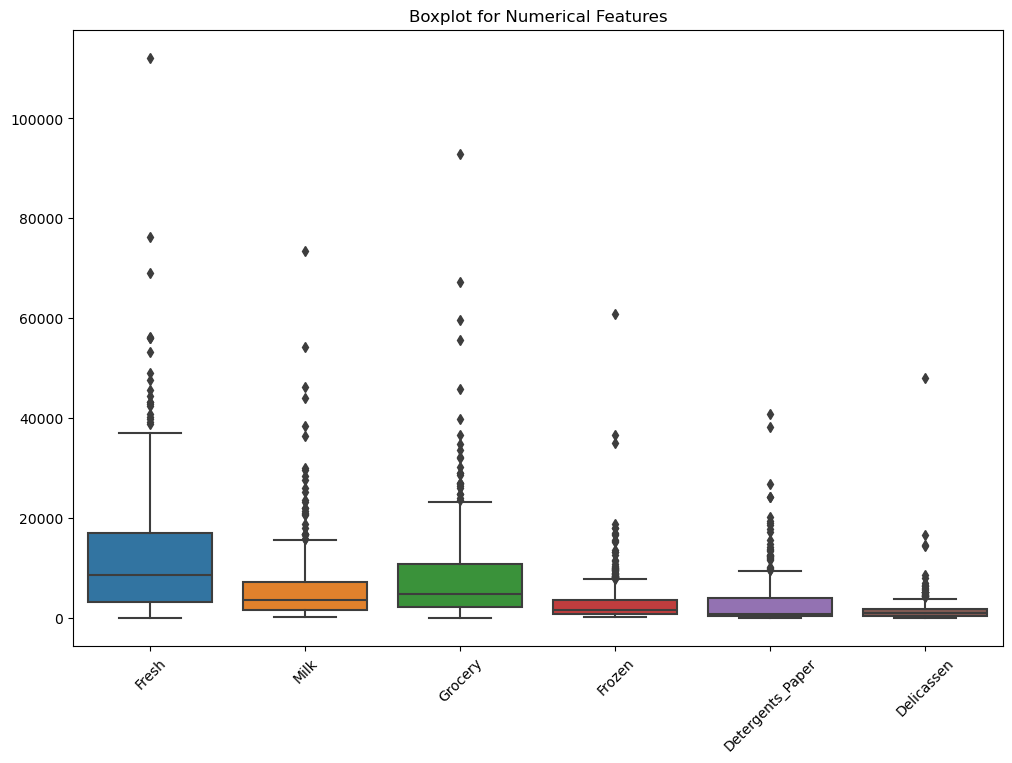

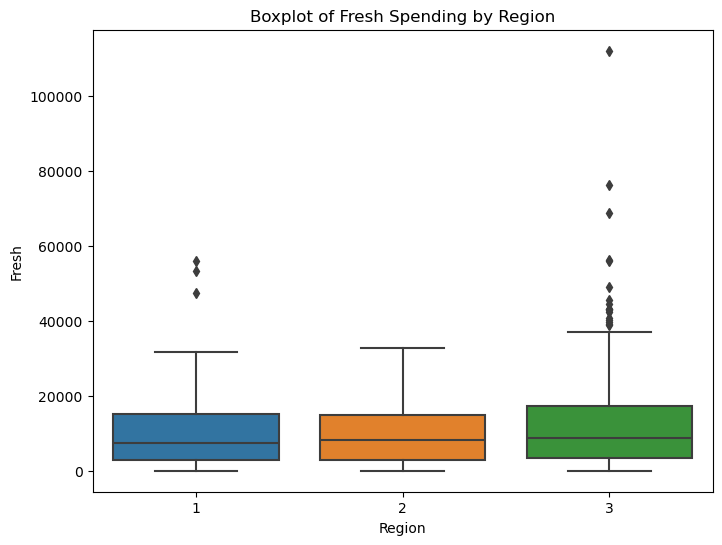

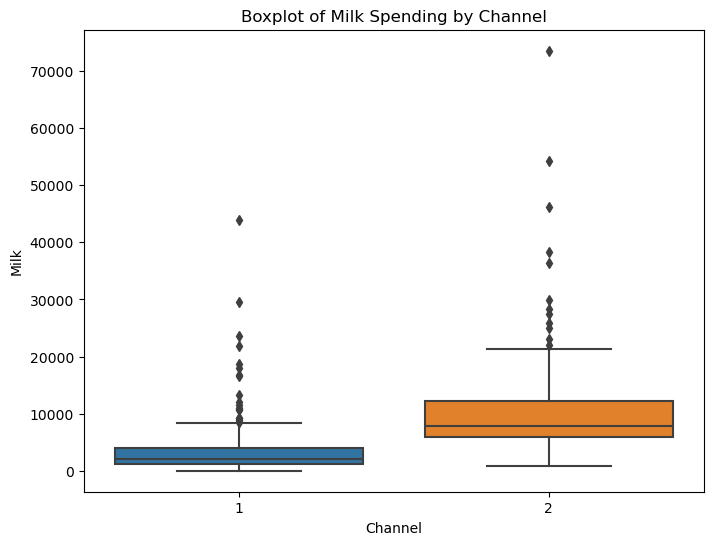

In [46]:
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Fresh', data=df)
plt.title('Boxplot of Fresh Spending by Region')
plt.xlabel('Region')
plt.ylabel('Fresh')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Channel', y='Milk', data=df)
plt.title('Boxplot of Milk Spending by Channel')
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.show()

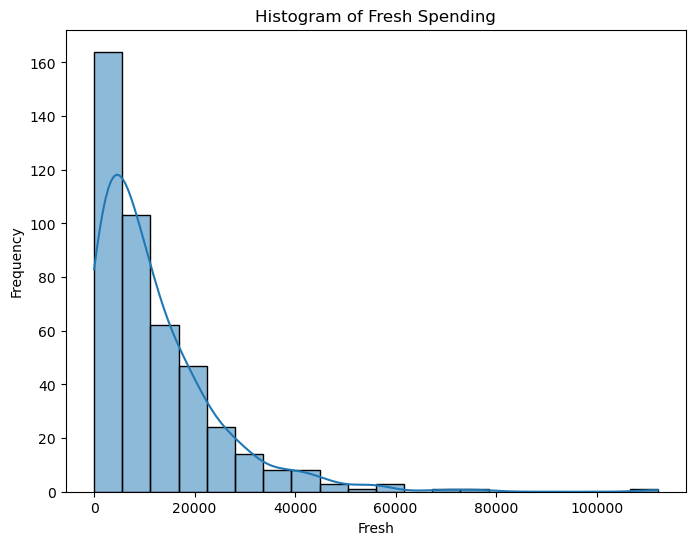

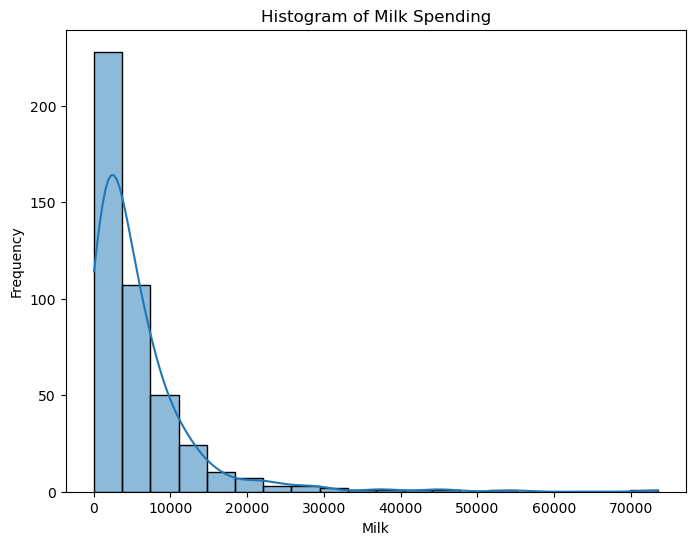

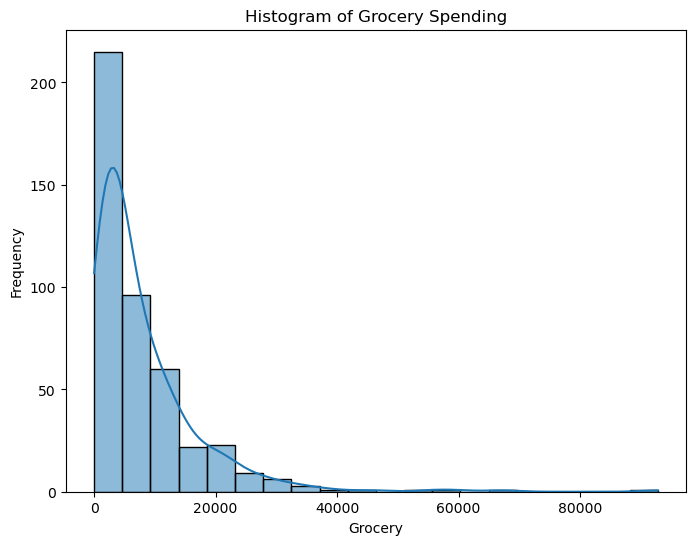

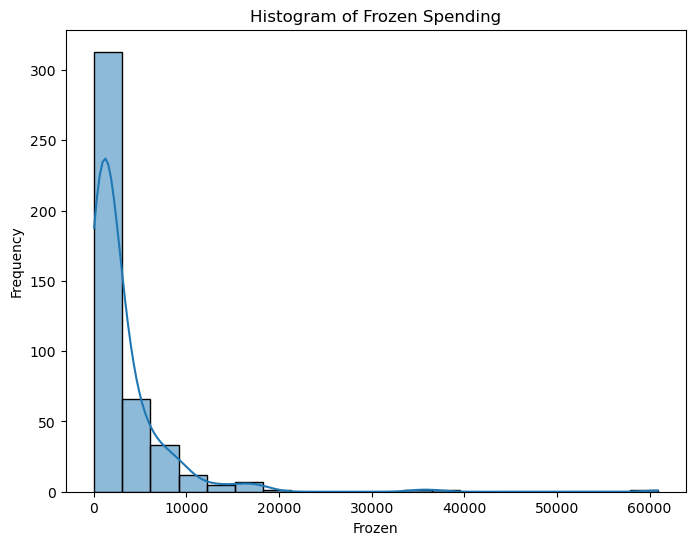

In [47]:
# Histograms
plt.figure(figsize=(8, 6))
sns.histplot(df['Fresh'], bins=20, kde=True)
plt.title('Histogram of Fresh Spending')
plt.xlabel('Fresh')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Milk'], bins=20, kde=True)
plt.title('Histogram of Milk Spending')
plt.xlabel('Milk')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Grocery'], bins=20, kde=True)
plt.title('Histogram of Grocery Spending')
plt.xlabel('Grocery')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Frozen'], bins=20, kde=True)
plt.title('Histogram of Frozen Spending')
plt.xlabel('Frozen')
plt.ylabel('Frequency')
plt.show()

## Outlier Detection

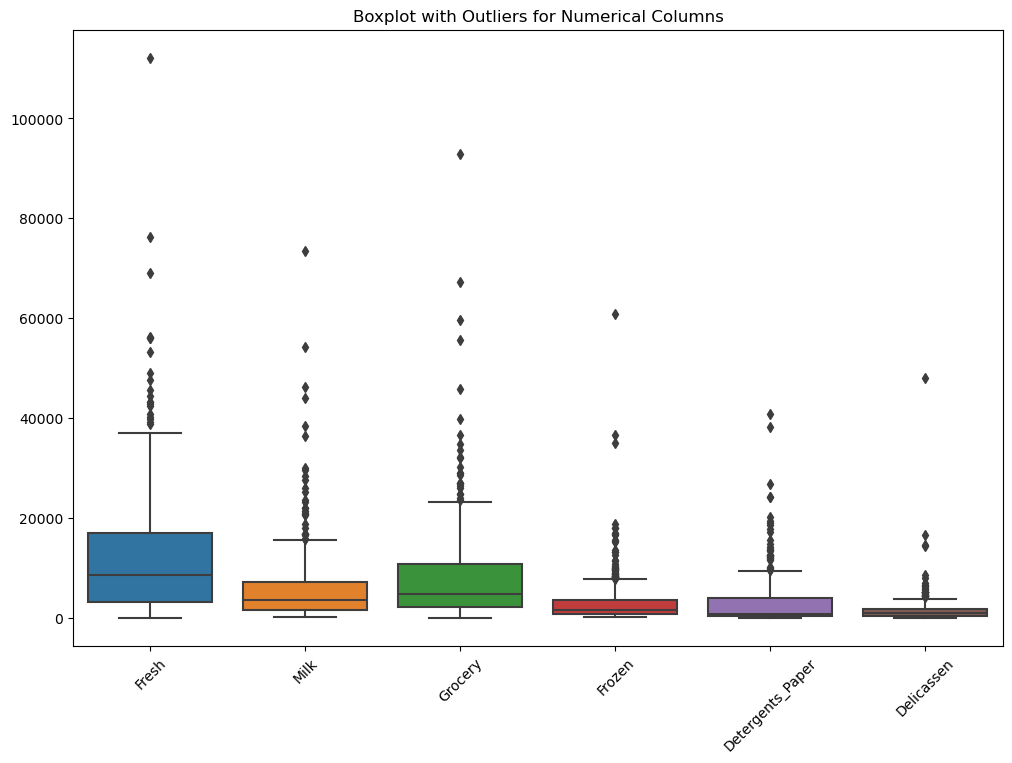

In [48]:
# List of numerical columns
numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a boxplot for each numerical column in the DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot with Outliers for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Function to count outliers for each column
def count_outliers(df, numerical_cols):
    outlier_counts = {}
    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outlier_counts[column] = outliers.count()
    return outlier_counts

# Count and print outliers
outlier_counts = count_outliers(df, numerical_cols)
print("Count of outliers in each column:\n", outlier_counts)

Count of outliers in each column:
 {'Fresh': 20, 'Milk': 28, 'Grocery': 24, 'Frozen': 43, 'Detergents_Paper': 30, 'Delicassen': 27}


In [50]:
# Function to impute outliers with median
def impute_outliers(df, numerical_cols):
    imputed_df = df.copy()
    for column in numerical_cols:
        Q1 = imputed_df[column].quantile(0.25)
        Q3 = imputed_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = imputed_df[column].median()
        imputed_df[column] = imputed_df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return imputed_df

# Impute outliers with median
df = impute_outliers(df, numerical_cols)

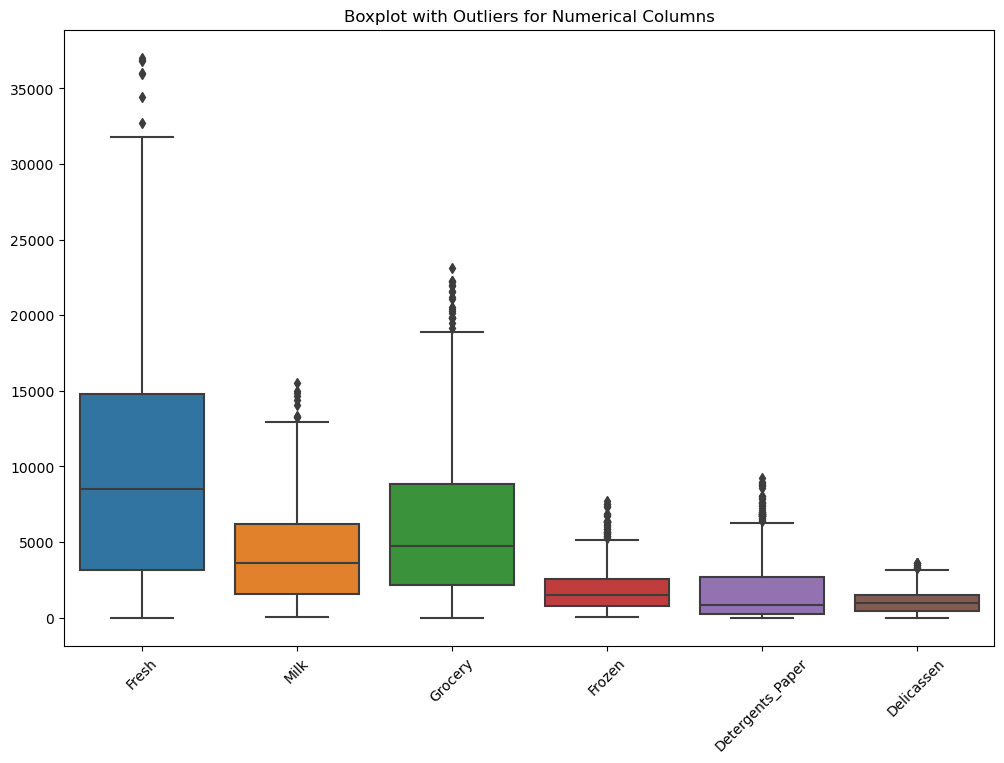

In [51]:
# Create a boxplot for each numerical column in the DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot with Outliers for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [52]:
df['Total_Bought'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
print("Feature engineering completed.")

Feature engineering completed.


## Hypothesis Testing

### Hypothesis 1
**Hypothesis**: There is a significant difference in the average spending on Fresh products between different Channels.

**Statistical Test**: Perform a t-test to compare the means of the Fresh product spending between Channel 1 and Channel 2.

In [53]:
from scipy.stats import ttest_ind

# Separate data by Channel
channel_1_fresh = df[df['Channel'] == 1]['Fresh']
channel_2_fresh = df[df['Channel'] == 2]['Fresh']

# Perform t-test
t_stat, p_val = ttest_ind(channel_1_fresh, channel_2_fresh)

print(f"T-test for Fresh spending between Channels:\nT-statistic: {t_stat}, P-value: {p_val}")

T-test for Fresh spending between Channels:
T-statistic: 3.1649830095975937, P-value: 0.0016590780393895264


#### Interpretation 
Given the t-statistic of approximately 3.165 and the p-value of approximately 0.0017, we conclude that there is a statistically significant difference in the average spending on Fresh products between the two channels. This means that the channel a customer belongs to does affect their average spending on Fresh products, and this difference is unlikely to be due to random chance.

### Hypothesis 2
**Hypothesis**: The spending on Milk is significantly correlated with the spending on Grocery items.

**Statistical Test**: Perform a Pearson correlation test to determine the strength and significance of the correlation between Milk and Grocery spending.

In [54]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
corr, p_val = pearsonr(df['Milk'], df['Grocery'])

print(f"Pearson correlation between Milk and Grocery spending:\nCorrelation: {corr}, P-value: {p_val}")

Pearson correlation between Milk and Grocery spending:
Correlation: 0.6155720601847327, P-value: 3.0761893841328634e-47


#### Interpretation
Given the correlation coefficient of approximately 0.616 and the extremely low p-value, we conclude that there is a statistically significant positive correlation between spending on Milk and Grocery items. This strong correlation is unlikely to be due to random chance. Therefore, customers who spend more on Milk also tend to spend more on Grocery items, and this relationship is statistically significant.

### Hypothesis 3
**Hypothesis**: The variance in spending on Detergents_Paper is significantly different between Regions.

**Statistical Test**: Perform an ANOVA test to compare the variances of Detergents_Paper spending across different Regions.

In [55]:
from scipy.stats import f_oneway

# Separate data by Region
region_1 = df[df['Region'] == 1]['Detergents_Paper']
region_2 = df[df['Region'] == 2]['Detergents_Paper']
region_3 = df[df['Region'] == 3]['Detergents_Paper']

# Perform ANOVA test
f_stat, p_val = f_oneway(region_1, region_2, region_3)

print(f"ANOVA test for Detergents_Paper spending across Regions:\nF-statistic: {f_stat}, P-value: {p_val}")

ANOVA test for Detergents_Paper spending across Regions:
F-statistic: 0.6533452114148076, P-value: 0.5208098068177276


#### Interpretation
Given the F-statistic of approximately 0.653 and the p-value of approximately 0.521, we fail to reject the null hypothesis. This means there is no statistically significant difference in the average spending on Detergents_Paper across the different regions. The observed differences in spending are likely due to random variation rather than any actual differences between the regions.

## Data Transformation

In [56]:
# One-Hot Encoding for 'Channel' and 'Region' variables
df = pd.get_dummies(df, columns=['Channel', 'Region'], drop_first=True)
print("Categorical variables encoded.")

Categorical variables encoded.


In [57]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(scaled_df.head())
print("Data scaled.")

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.312278  1.581331  0.251637 -1.005765          0.384841    0.302219   
1 -0.352577  1.626645  0.627928 -0.080488          0.659291    0.823978   
2 -0.435980  1.331810  0.274698  0.303849          0.758164   -0.141514   
3  0.382886 -0.907994 -0.374579  2.694150         -0.575956    0.838273   
4  1.490583  0.331960  0.183578  1.206413         -0.012868   -0.141514   

   Total_Bought  Channel_2  Region_2  Region_3  
0      0.711729   1.448652 -0.345822  0.626422  
1      0.643238   1.448652 -0.345822  0.626422  
2      0.357089   1.448652 -0.345822  0.626422  
3      0.166795  -0.690297 -0.345822  0.626422  
4      1.340657   1.448652 -0.345822  0.626422  
Data scaled.


## Correlation Analysis

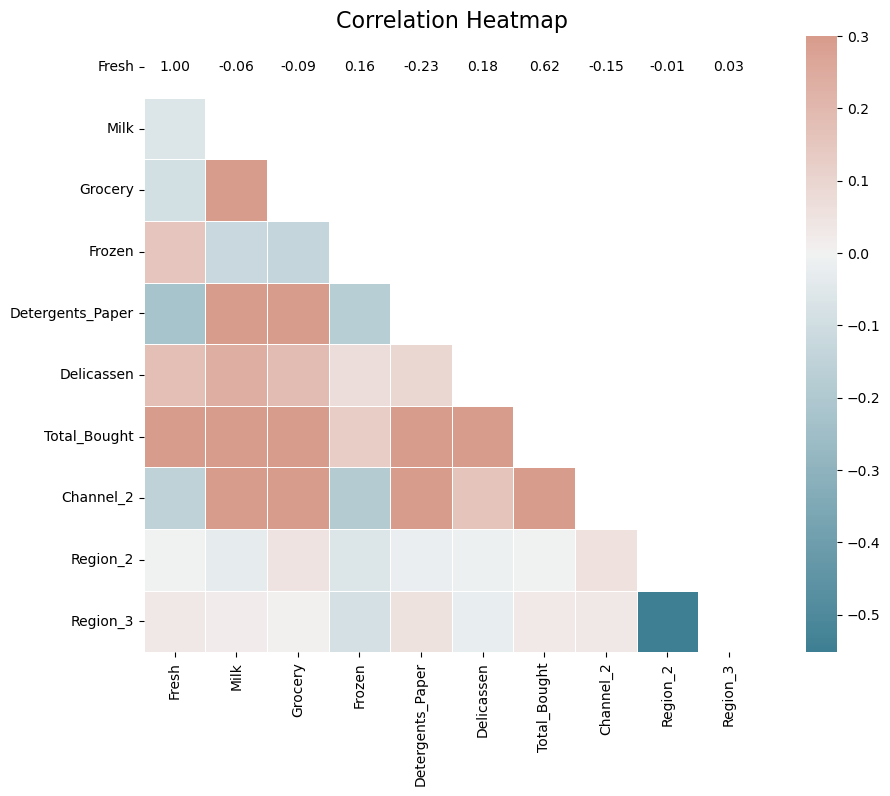

In [58]:
# Calculate the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=corr, fmt=".2f", annot_kws={"size": 10, "color": "black"})

ax.set_title('Correlation Heatmap', fontsize=16)
plt.show()

## Feature Selection

In [59]:
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Create a boolean mask to identify highly correlated pairs
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Display highly correlated pairs
print("Highly correlated pairs (threshold > 0.7):")
print(high_corr_var)

# Selecting features to remove: Only remove one feature from each pair
features_to_remove = set([y for x, y in high_corr_var])

# Remove redundant features from the DataFrame
df_reduced = df.drop(columns=features_to_remove)

# Display the reduced DataFrame
print("Features removed due to high correlation:", features_to_remove)
print("Reduced DataFrame shape:", df_reduced.shape)
print(df_reduced.head())

Highly correlated pairs (threshold > 0.7):
[('Grocery', 'Detergents_Paper')]
Features removed due to high correlation: {'Detergents_Paper'}
Reduced DataFrame shape: (440, 9)
     Fresh    Milk  Grocery  Frozen  Delicassen  Total_Bought  Channel_2  \
0  12669.0  9656.0   7561.0   214.0      1338.0       34112.0          1   
1   7057.0  9810.0   9568.0  1762.0      1776.0       33266.0          1   
2   6353.0  8808.0   7684.0  2405.0       965.5       29731.5          1   
3  13265.0  1196.0   4221.0  6404.0      1788.0       27381.0          0   
4  22615.0  5410.0   7198.0  3915.0       965.5       41880.5          1   

   Region_2  Region_3  
0         0         1  
1         0         1  
2         0         1  
3         0         1  
4         0         1  


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [60]:
df_kmeans = df_reduced.copy()

In [61]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_kmeans)
    inertia.append(kmeans.inertia_)

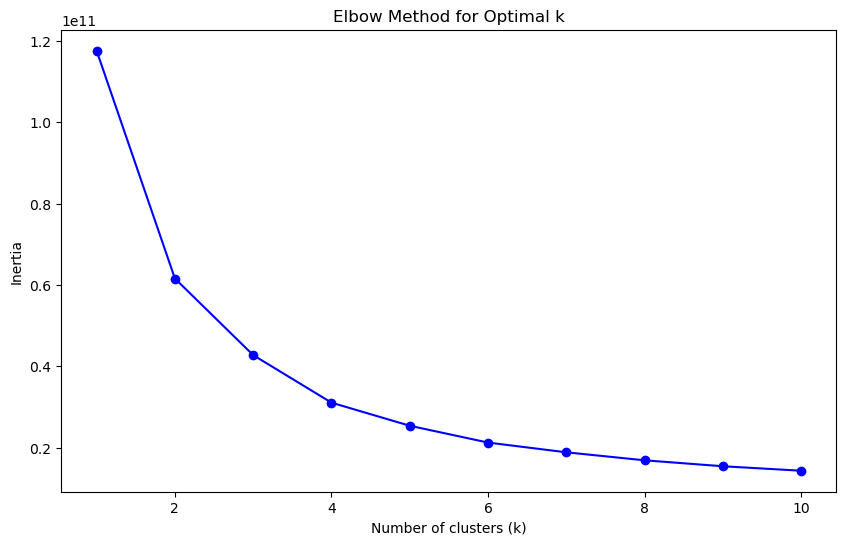

In [62]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Identifying the Elbow
In the plot, the "elbow" appears to be around **k = 4**. Here’s why:
- Up to k = 4, there is a significant reduction in inertia with each additional cluster.
- After k = 4, the rate of decrease in inertia diminishes, indicating that adding more clusters beyond this point yields marginal gains in clustering quality.

In [63]:
# Apply K-means clustering with the chosen number of clusters (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_kmeans['Cluster'] = kmeans.fit_predict(df_kmeans)

# Display the DataFrame with cluster labels
print(df_kmeans.head())

     Fresh    Milk  Grocery  Frozen  Delicassen  Total_Bought  Channel_2  \
0  12669.0  9656.0   7561.0   214.0      1338.0       34112.0          1   
1   7057.0  9810.0   9568.0  1762.0      1776.0       33266.0          1   
2   6353.0  8808.0   7684.0  2405.0       965.5       29731.5          1   
3  13265.0  1196.0   4221.0  6404.0      1788.0       27381.0          0   
4  22615.0  5410.0   7198.0  3915.0       965.5       41880.5          1   

   Region_2  Region_3  Cluster  
0         0         1        1  
1         0         1        2  
2         0         1        2  
3         0         1        1  
4         0         1        3  


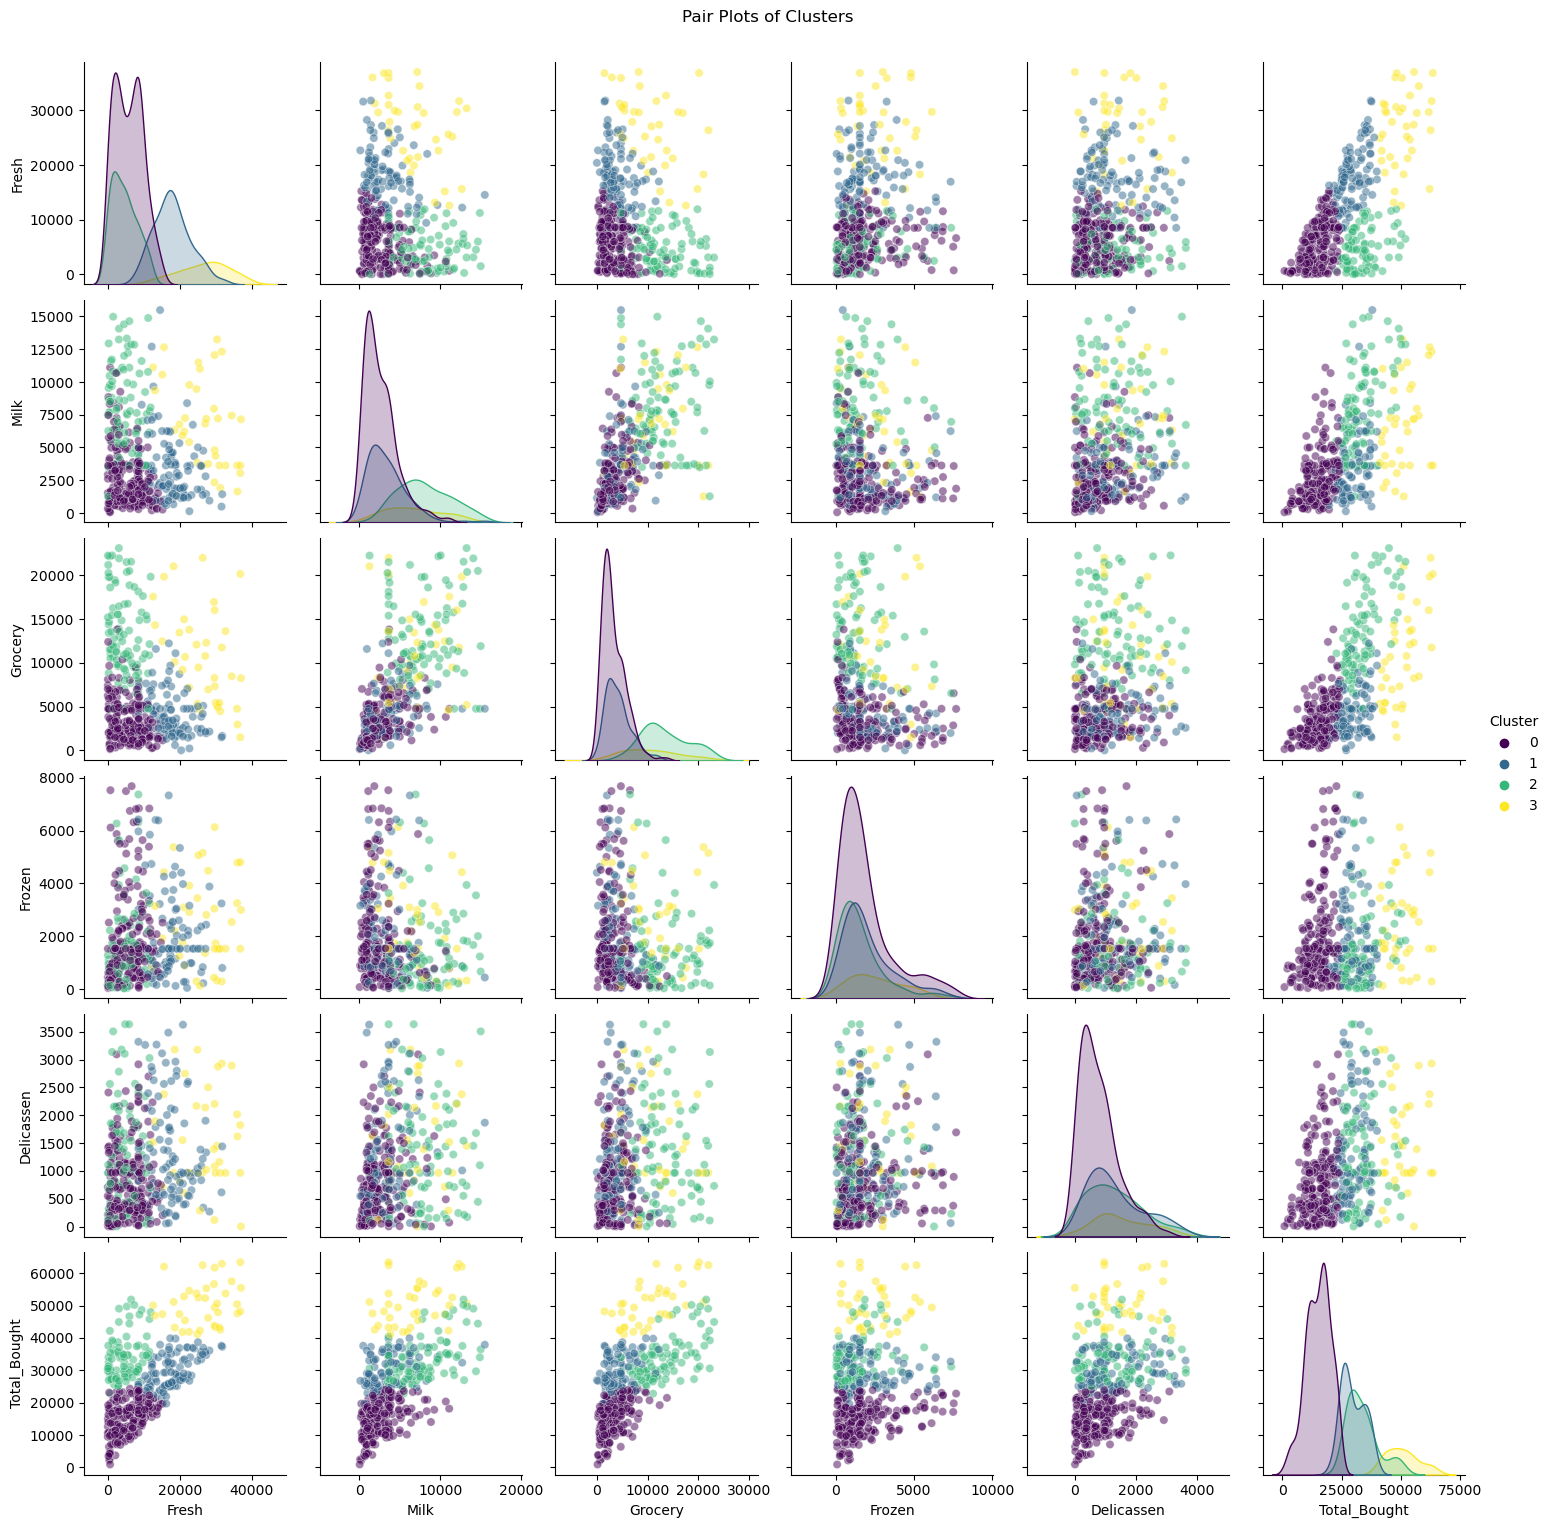

In [64]:
# Define the numerical columns and the cluster column
numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen', 'Total_Bought']
df_kmeans['Cluster'] = kmeans.labels_

# Create pair plots
sns.pairplot(df_kmeans, vars=numerical_cols, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plots of Clusters', y=1.02)
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [69]:
df_hierarchical = df_reduced.copy()

In [70]:
# perform hierarchical clustering
Z = linkage(df_hierarchical, method='ward')

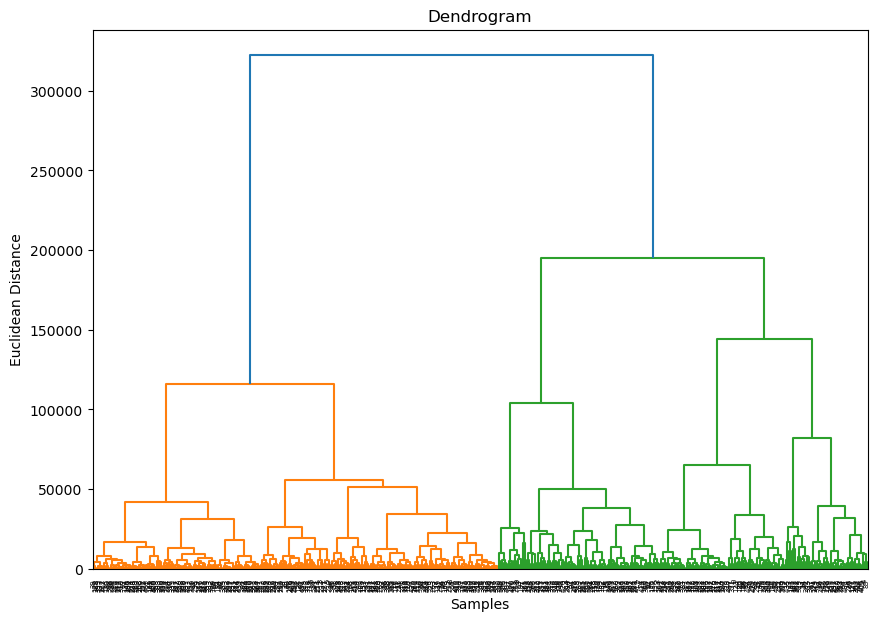

In [71]:
# plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [72]:
# Determine the optimal number of clusters (e.g., 2)
optimal_clusters = 2

# Assign cluster labels
df_hierarchical['Cluster'] = fcluster(Z, optimal_clusters, criterion='maxclust')

# Display the DataFrame with cluster labels
print(df_hierarchical.head())

     Fresh    Milk  Grocery  Frozen  Delicassen  Total_Bought  Channel_2  \
0  12669.0  9656.0   7561.0   214.0      1338.0       34112.0          1   
1   7057.0  9810.0   9568.0  1762.0      1776.0       33266.0          1   
2   6353.0  8808.0   7684.0  2405.0       965.5       29731.5          1   
3  13265.0  1196.0   4221.0  6404.0      1788.0       27381.0          0   
4  22615.0  5410.0   7198.0  3915.0       965.5       41880.5          1   

   Region_2  Region_3  Cluster  
0         0         1        2  
1         0         1        2  
2         0         1        2  
3         0         1        1  
4         0         1        2  


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [79]:
# Perform PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_hierarchical.drop('Cluster', axis=1))

In [80]:
# Add PCA components to the DataFrame
df_hierarchical['PCA1'] = pca_transformed[:, 0]
df_hierarchical['PCA2'] = pca_transformed[:, 1]

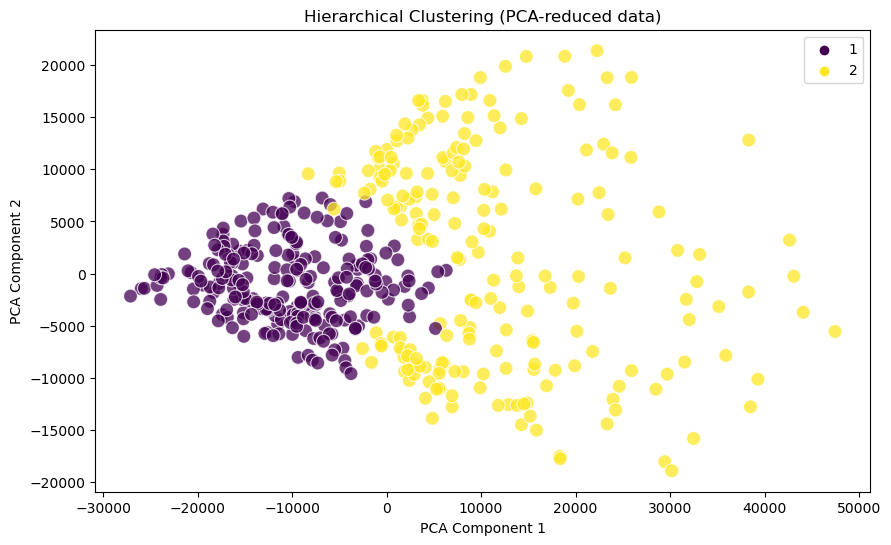

In [81]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_hierarchical, palette='viridis', s=100, alpha=0.75)
plt.title('Hierarchical Clustering (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

In [82]:
# analyze Principal Components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

Explained variance by each principal component: [0.74553592 0.21459417]


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. **Optimal Clustering**: The PCA and dendrogram analysis suggest that three distinct clusters (k=3) provide an optimal balance for customer segmentation, supported by the elbow method indicating a clear "elbow" at k=3. This clustering should be used for targeted marketing and personalized customer interactions.

2. **Customer Purchase Patterns**: The histograms and box plots reveal that most product categories exhibit right-skewed distributions, indicating that a majority of customers purchase low to moderate amounts, with a few making significantly higher purchases. This is particularly evident in Fresh, Milk, and Grocery products, which require careful stock management and bulk purchase strategies.

3. **Correlation and Product Bundling**: The heat map highlights strong positive correlations between Milk, Grocery, and Detergents_Paper purchases, suggesting these items are often bought together. Cross-promotional strategies and bundled offers can be designed to leverage these relationships, enhancing sales efficiency.

4. **Channel and Region Insights**: The categorical distribution of Channel and Region variables indicates distinct customer groups by sales channels and geographic locations. Tailoring inventory, marketing strategies, and product offerings to these segments can enhance customer satisfaction and operational efficiency.